SIMULACION MICROGOTA 
====================

Primero, tenemos las variables:
$$\rho_a: \text{Densidad del aire}$$
$$\rho_d: \text{Densidad de la gota}$$
$$F_d: \text{Friccion con el aire}$$
$$E: \text{Empuje} $$
$$\eta: \text{Viscosidad dinamica del aire}$$
Luego, la ecuacion de movimiento sera

$$m\frac{dv}{dt}= E + F_d - mg = \frac{4\pi}{3} r_d^3 \rho_a g - 6\pi \eta r_d v - \frac{4\pi}{3} r_d^3 \rho_d g $$

Podemos colocar la ecuacion para usar odeint:

$$ \frac{dv}{dt}= \frac{\rho_a}{\rho_d} g - \frac{9 \eta}{2  r_d^2 \rho_d}  v - g $$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

pi=np.pi

ro_a= 1.225 # kg/m3
ro_d= 1000 # kg/m3
eta= 1.849e-5 # kg/m.s 
r_d= 5e-6 # m
g= 9.81 # m/s2

alpha= 10

In [3]:
def F(y,t):
    
    dy=[0,0]
    dy[0]= y[1] 
    dy[1]= (((ro_a /ro_d) - 1) * g) - ((9 *eta / (2 * (r_d**2) * ro_d)) * y[1])
    return dy

In [4]:
t_inicial= 0
t_max= 0.005
#t_max= 0.2
dt= 0.00001
t= np.arange(t_inicial, t_max+dt, dt)

In [5]:
y0=[0.0, 0.0]

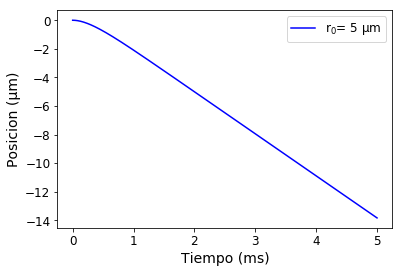

In [6]:
plt.figure()
plt.rcParams['font.size']=12

#plt.rc('xtick', labelsize=13) 
#plt.rc('ytick', labelsize=13) 

y= odeint(F, y0, t)
plt.plot(t*1E3,y[:,0]*1E6,'b', label='r$_0$= 5 \N{greek small letter mu}m')
ax=plt.gca()
#ax.set_title('Simulacion gota Z(t)')
ax.set_xlabel('Tiempo (ms)',fontsize=14)
ax.set_ylabel('Posicion (\N{greek small letter mu}m)',fontsize=14)
plt.axis()
ax.legend()
plt.show()

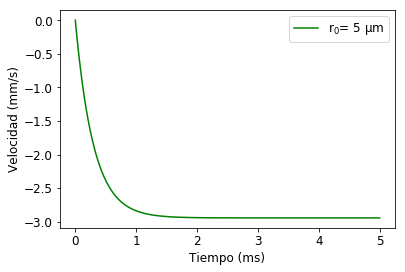

In [7]:
plt.plot(t*1E3,y[:,1]*1E3,'g', label='r$_0$= 5 \N{greek small letter mu}m')
ax=plt.gca()
#ax.set_title('Simulacion gota Vz(t)')
ax.set_xlabel('Tiempo (ms)')
ax.set_ylabel('Velocidad (mm/s)')
ax.legend()
plt.axis()
plt.show()

In [8]:
vel_max= (2*g*(r_d**2)*(ro_d-ro_a))/(9*eta);
print('La velocidad limite teorica, cuando dv/dt -> 0 sera:\n {:.8f} m/s'.format(vel_max))

La velocidad limite teorica, cuando dv/dt -> 0 sera:
 0.00294393 m/s


In [9]:
#print(len(y))
n= len(y)
for i in range(len(y)):
    if abs(y[i,1] + vel_max) < 0.00000001:
        print('{}\t\tmaxvel = {:.8f} m/s en posicion {:.3f} \N{greek small letter mu}m en t= {:.7f} ms'.format(i, y[i,1], y[i,0]*1e6, t[i]*1e3))
        break
print('{}\t\tmaxvel = {:.8f} m/s en posicion {:.3f} \N{greek small letter mu}m en t= {:.7f} ms'.format(n-1, y[n-1,1], y[n-1,0]*1e6, t[n-1]*1e3))        

379		maxvel = -0.00294392 m/s en posicion -10.273 μm en t= 3.7900000 ms
500		maxvel = -0.00294393 m/s en posicion -13.835 μm en t= 5.0000000 ms



Observamos que la velocidad limite obtenida numericamente es la misma a la teorica con una precision de 7 decimales. 
Ademas esta velocidad se obtiene luego de 0.003832 segundos de iniciarse el movimiento y esta haya caido $10.397 \mu m$


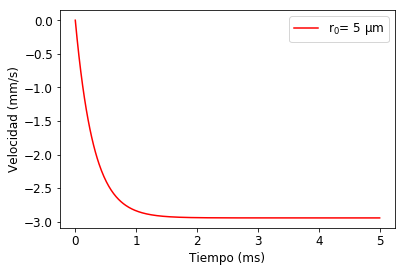

In [10]:
k= ((ro_a/ro_d)-1)
k1= 9 *eta / (2 * (r_d**2) * ro_d)
y_exac= (k*g/k1) * ( 1 - np.exp(-k1*t)) 

plt.plot(t*1e3,y_exac*1e3,'r', label='r$_0$= 5 \N{greek small letter mu}m')
ax=plt.gca()
#ax.set_title('Solucion analitica para Vz(t)')
ax.set_xlabel('Tiempo (ms)')
ax.set_ylabel('Velocidad (mm/s)')
ax.legend()
plt.axis()
plt.show()
plt.show()

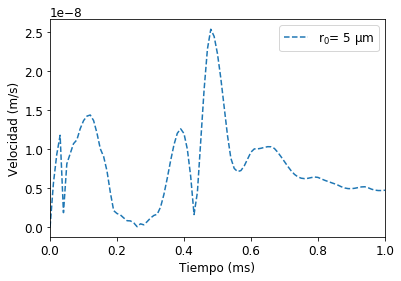

In [11]:
plt.plot(t*1e3,abs(y[:,1]-y_exac),'--', label='r$_0$= 5 \N{greek small letter mu}m')
ax=plt.gca()
#ax.set_title('Error entre analitico y numerico pra Vz')
plt.xlim(0, 1.0)
ax=plt.gca()
ax.set_xlabel('Tiempo (ms)')
ax.set_ylabel('Velocidad (m/s)')
ax.legend()
plt.axis()
plt.show()
plt.show()
plt.show()


Ahora resolveremos considerando parte de la gota se evapora, aca consideramos el termino $\dot{m} $:

$$m\frac{dv}{dt} + v\frac{dm}{dt}= E + F_d - mg = \frac{4\pi}{3} r_d^3 \rho_a g - 6\pi \eta r_d v - \frac{4\pi}{3} r_d^3 \rho_d g $$ 

luego

$$ \frac{dv}{dt}= \left( \frac{\rho_a}{\rho_d} - 1 \right) g - \frac{9 \eta}{2  r^2(t) \rho_d}  v  - \frac{v}{m}\frac{dm}{dt}  $$

$$ \frac{dv}{dt}= \left( \frac{\rho_a}{\rho_d} - 1 \right) g - \frac{9 \eta}{2  r_d^2 e^{-2 \alpha t} \rho_d}  v  - \frac{-3\alpha r_d^3 e^{-3\alpha t}}{ r_d^3 e^{-3\alpha t} } v $$

$$ \frac{dv}{dt}= \left( \frac{\rho_a}{\rho_d} - 1 \right) g - \frac{9 \eta}{2  r_d^2 e^{-2 \alpha t} \rho_d}  v  + 3\alpha v $$


con

$$r(t) = r_d e^{-\alpha t} $$

In [12]:
def G(y,t):
    
    dy=[0,0]
    dy[0]= y[1] 
    dy[1]= (((ro_a /ro_d) - 1) * g ) - (9 *eta / (2 * ( r_d**2 * np.exp(-2*t*alpha) * ro_d))) * y[1] + 3*alpha * y[1]
    return dy

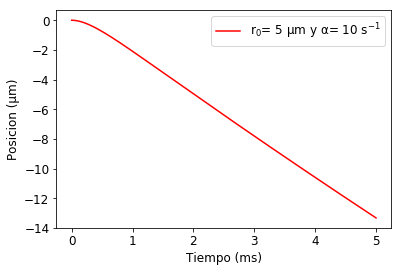

In [13]:
plt.figure()
y2= odeint(G, y0, t)
plt.plot(t*1E3,y2[:,0]*1E6,'r', label='r$_0$= 5 \N{greek small letter mu}m y \N{greek small letter alpha}= 10 s$^{-1}$' )
ax=plt.gca()
#ax.set_title('Simulacion gota Z(t)')
ax.set_xlabel('Tiempo (ms)')
ax.set_ylabel('Posicion (\N{greek small letter mu}m)')
plt.axis()
ax.legend()
plt.show()

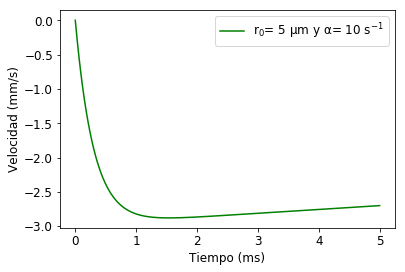

In [14]:
plt.plot(t*1E3,y2[:,1]*1E3,'g', label='r$_0$= 5 \N{greek small letter mu}m y \N{greek small letter alpha}= 10 s$^{-1}$' )
ax=plt.gca()
#ax.set_title('Simulacion gota Vz(t)')
ax.set_xlabel('Tiempo (ms)')
ax.set_ylabel('Velocidad (mm/s)')
plt.axis()
ax.legend()
plt.show()

In [15]:
import matplotlib.animation as animation

